# AFIF JETHAM
### Grip @ The Spark Foundation
### Task 1 - Prediction using Supervised ML
### ***Simple Linear Regression***
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing required important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Link
URL = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
# reading data from the link
df = pd.read_csv(URL)

In [4]:
df.shape

(25, 2)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# checking data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
# checking if any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Creating Scatter plot of data set to see if we can manually find any relationship between the data and if there is any outlier.**

Text(0, 0.5, 'Percentage Score')

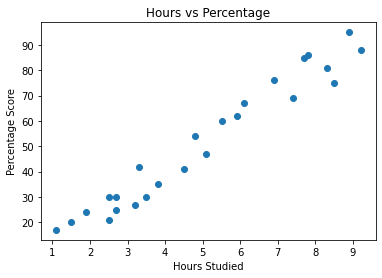

In [9]:
plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. And also there is no outlier in the data.

**Splitting the Data into Train and Test sets.**

In [10]:
X = df.iloc[:, :-1].values       # independent variable
y = df.iloc[:, 1].values         # dependent variable
#X = df.drop('Scores', axis=1)    
#y = df['Scores']

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, true_pred = train_test_split(X, y, 
                            test_size=0.3, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
# importing linear regression model
from sklearn.linear_model import LinearRegression

In [13]:
lreg = LinearRegression()

In [14]:
lreg.fit(x_train, y_train)

LinearRegression()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

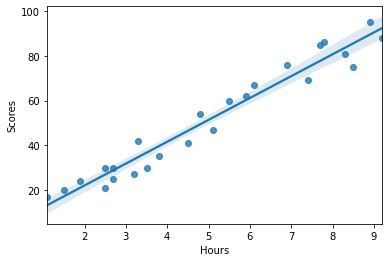

In [15]:
# Plotting the regression line
sns.regplot(df['Hours'],df['Scores'])

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
pred = lreg.predict(x_test)

In [17]:
pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [18]:
# performance of our model - r2 of test
lreg.score(x_test, true_pred)

0.9568211104435257

In [19]:
# performance of our model - r2 of train
lreg.score(x_train, y_train)

0.9484997422695115

*As we can notice that the R2 value for the test is greater than the train, So our model was successful.*

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the root mean square error. There are many such metrics.

In [20]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
rmse_test = sqrt(mean_squared_error(true_pred, pred)) 
rmse_train = sqrt(mean_squared_error(x_train, y_train))
print(rmse_test)
print(rmse_train)

4.792191274636315
54.39800493746503


*As we can notice that the RMSE Score is lower for the test compared to the train, So our model was successful.*

In [21]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual': true_pred, 'Predicted': pred})
comp

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


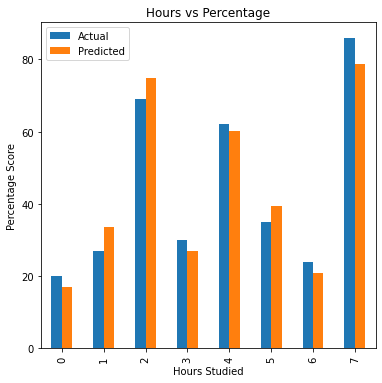

In [22]:
# Visualizing the difference between Actual and Predicted Values.
comp.plot(kind='bar', figsize=(6,6))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**Predicting score if a student studies for 9.25 hrs/ day**

In [23]:
hours = np.array(9.25)
hours= hours.reshape(-1, 1)
own_pred = lreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


### Result

**An Approximately 93% is achieved by student if he/she studies for 9.25 hrs/day.**

***Thankyou.***